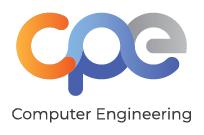

# CPE111/ISY202
# Session9: Graphs
## Topic

* Graphs and Graphs Implementation
* NetworkX
* Connectivity
* Euler and Hamuilton Paths
* Shortest-Path Problems

---

# Graphs
__Definition__: <br>
A graph $G = (V, E)$ consists of a nonempty set $V$ of vertices (or nodes) and a set $E$ of edges. <br> 

Each edge has either one or two vertices associated with it, called its __endpoints__. An edge is said to connect its endpoints.

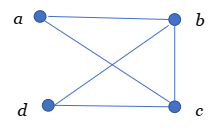

Example of a graph with 4 vertices, 5 edges: <br>
$V$ = {$a, b, c, d$} <br>
$G$ = {$(a,b), (a,c), (b,c), (b,d), (c,d)$}

## Directed Graphs
__Definition__: <br>
An `directed graph` (or `digraph`) $G = (V, E)$ consists of a nonempty set $V$ of vertices (or nodes) and a set $E$ of directed edges (or arcs). <br>

Each edge is associated with an ordered pair of vertices. <br> 
The directed edge associated with the __ordered pair__ $(u,v)$ is said to start at $u$ and end at $v$. <br>

__Remark__: Graphs where the end points of an edge are not ordered are said to be `undirected graphs`.

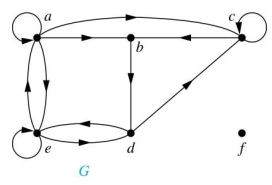

## Implementation of Graphs

## NetworkX
NetworkX is a Python language software package for the creation, manipulation, and study of the structure, dynamics, and function of complex networks.

With NetworkX you can load and store networks in standard and nonstandard data formats, generate many types of random and classic networks, analyze network structure, build network models, design new network algorithms, draw networks, and much more.

Library documentation: <a>https://networkx.github.io/</a>

By definition, a Graph is a collection of nodes (vertices) along with identified pairs of nodes (called edges, links, etc). <br> 
In NetworkX, nodes can be any hashable object e.g., a text string, an image, an XML object, another Graph, a customized node object, etc.

In [1]:
# Install networkx package
#!pip install networkx

                                              0.0/2.1 MB ? eta -:--:--
     -------                                  0.4/2.1 MB 7.6 MB/s eta 0:00:01
     -------------                            0.7/2.1 MB 7.6 MB/s eta 0:00:01
     --------------------                     1.0/2.1 MB 8.3 MB/s eta 0:00:01
     ---------------------------              1.4/2.1 MB 7.5 MB/s eta 0:00:01
     ----------------------------------       1.8/2.1 MB 7.6 MB/s eta 0:00:01
     ---------------------------------------  2.1/2.1 MB 7.3 MB/s eta 0:00:01
     ---------------------------------------- 2.1/2.1 MB 7.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.1.2 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import matplotlib.pyplot as plt
import networkx as nx
G = nx.Graph() # Undirected Graph

### Nodes

The graph `G` can be grown in several ways.  NetworkX includes many graph generator functions and
facilities to read and write graphs in many formats.

In [3]:
# Add one node at a time
G.add_node(1)

In [4]:
# or add nodes from any iterable container, such as a list
G.add_nodes_from([2, 3])

In [5]:
# add nodes along with node
# attributes if your container yields 2-tuples of the form
# `(node, node_attribute_dict)`:
G.add_nodes_from([(4, {"color": "red"}),
                  (5, {"color": "green"}),
                 ])

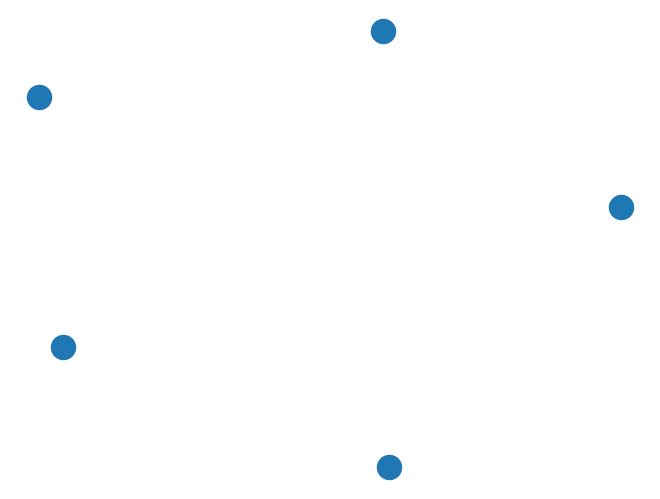

In [6]:
# To display the graph
nx.draw(G)

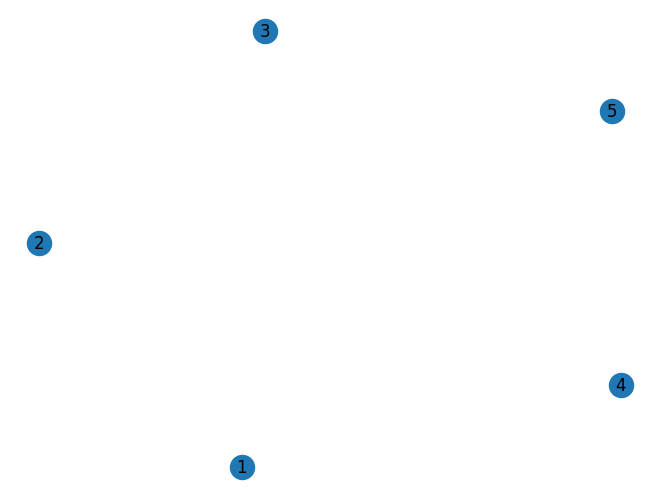

In [7]:
nx.draw(G,with_labels=True)

### Edges

In [8]:
# G can also be grown by adding one edge at a time,
G.add_edge(1, 2)

# add a tuple of edges
e = (2, 3)
G.add_edge(*e)  # unpack edge tuple*

In [9]:
# by adding a list of edges,
G.add_edges_from([(1, 3), (1, 4), (1, 1)]) # ถ้าเพิ่ม edge เดิม มันจะแสดงเหมือนเดิม

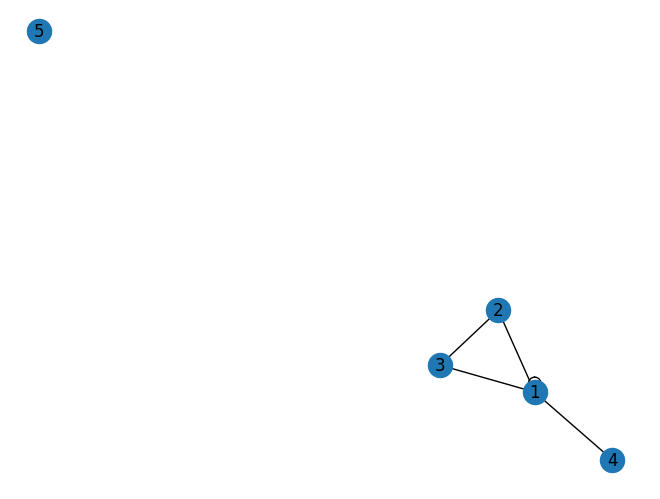

In [10]:
nx.draw(G, with_labels=True)

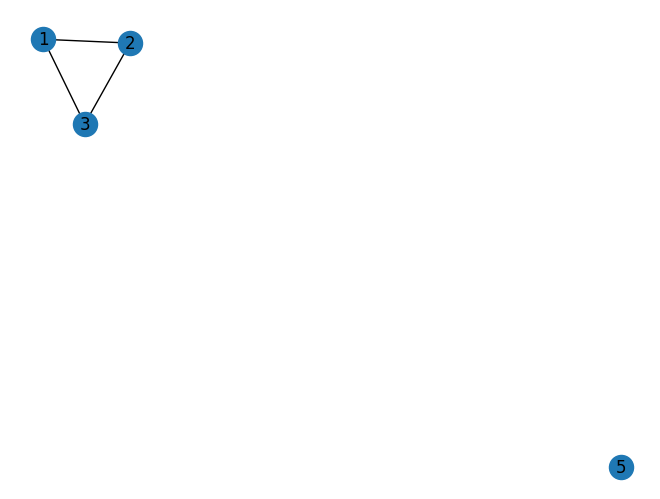

In [11]:
# can also remove or clear
G.remove_node(4)
nx.draw(G, with_labels=True)

In [12]:
# To remove all nodes and edges
G.clear()

---

### `Practice#1` Create a graph with networkX

1.
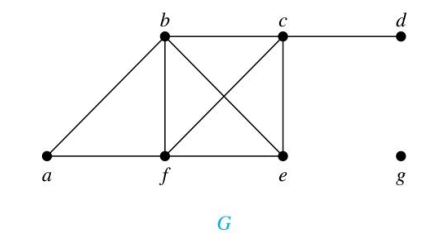

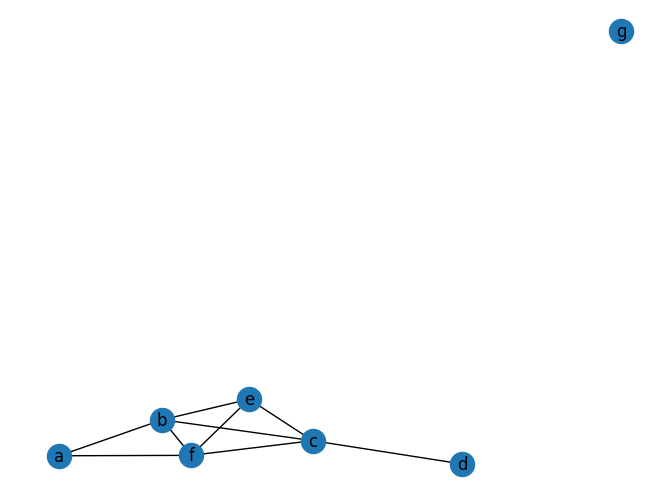

In [13]:
# Enter code here
G = nx.Graph()
G.add_edges_from([("a","b"),("a","f"),("b","c"),("b","e"),("b","f"),("c","d"),("c","e"),("c","f"),("e","f")])
# เราสามารถ add edges ได้เลย เพราะมันจะสร้าง node อัตโนมัติ
G.add_node("g")
nx.draw_spring(G, with_labels=True) # Draw style เป็นการวาดให้อยู่ในรูปร่างที่กำหนด

---

2.
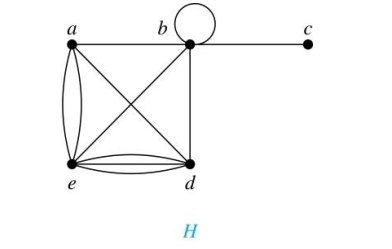

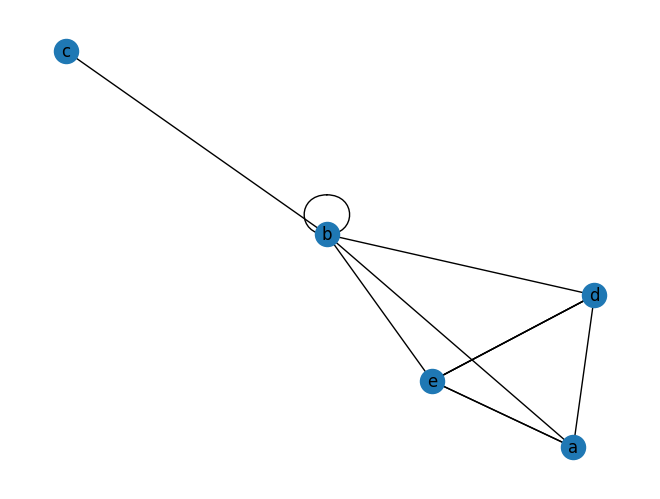

In [16]:
# Enter code here
# Hint: use MultiGraph() # มี vertex ได้หลายเส้น (add edge ซ้ำได้)
# H = nx.MultiGraph()
H = nx.MultiGraph()
H.add_edges_from([("a","b"),("a","d"),("a","e"),("a","e"),("b","b"),("b","c"),("b","d"),("b","e"),("d","e"),("d","e"),("d","e")])

nx.draw(H, with_labels = True)

# จริงๆมันลากสองเส้น มันทำให้เส้นมันหนากว่า (เราอาจจะสั่งให้มันเป็นเส้นโค้งได้)

---

3.
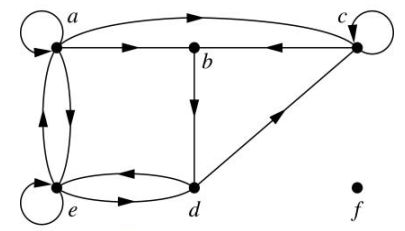

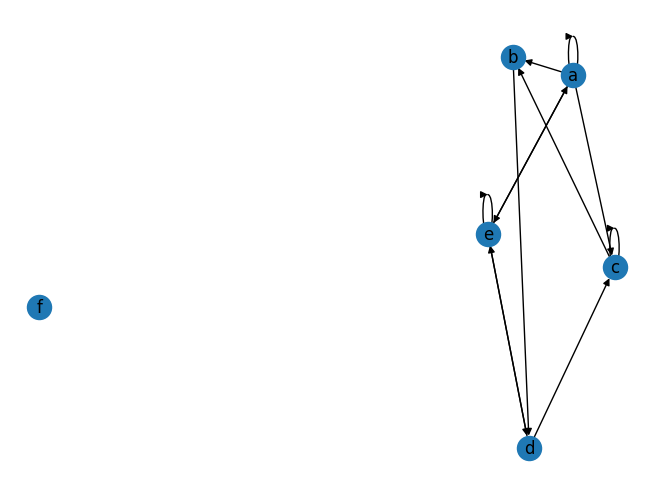

In [11]:
# Hint: use DiGraph()
import networkx as nx
D = nx.DiGraph()
D.add_edges_from([("a","a"),("a","b"),("a","c"),("a","e"),("b","d"),("c","c"),("c","b"),("d","c"),("d","e"),("e","e"),("e","a"),("e","d")])
D.add_node("f")
nx.draw(D, with_labels = True)


---

### Adjacent (or neighbors) (มองที่ Vertex)<br>
__definition__: <br>
Two vertices $u$, $v$ in an undirected graph $G$ are called `adjacent (or neighbors)` in $G$ if there is an edge $e$ between $u$ and $v$. 

### Incident (มองที่ Edge) <br>
__definition__: <br>
An edge $e$ is called `incident` with the vertices $u$ and $v$ and $e$ is said to connect $u$ and $v$.

### Degree (จำนวน edge ของ vertex นั้น)<br>
__definition__: <br>
The `degree` of a vertex in a undirected graph is the number of edges `incident` with it, except that a loop at a vertex contributes __two__ to
the degree of that vertex. The degree of the vertex $v$ is denoted by $deg(v)$

In [17]:
# Check number of nodes in Graph and node lists of Graph
print(G.number_of_nodes())
G.nodes()

7


NodeView(('a', 'b', 'f', 'c', 'e', 'd', 'g'))

In [18]:
# Check number of edges in Graph and edge lists of Graph
print(G.number_of_edges())
G.edges()

9


EdgeView([('a', 'b'), ('a', 'f'), ('b', 'c'), ('b', 'e'), ('b', 'f'), ('f', 'c'), ('f', 'e'), ('c', 'd'), ('c', 'e')])

In [19]:
print(H.number_of_edges())
H.edges()

11


MultiEdgeDataView([('a', 'b'), ('a', 'd'), ('a', 'e'), ('a', 'e'), ('b', 'b'), ('b', 'c'), ('b', 'd'), ('b', 'e'), ('d', 'e'), ('d', 'e'), ('d', 'e')])

In [20]:
# Incident of Node 'a' 
# return as edge list that connect to Node 'a'
H.edges('a')

MultiEdgeDataView([('a', 'b'), ('a', 'd'), ('a', 'e'), ('a', 'e')])

In [21]:
# Degree is the number of connections a node has
# retrun as the tuple(node, degree of node)
print(G.degree())
print(G.degree("a"))

[('a', 2), ('b', 4), ('f', 4), ('c', 4), ('e', 3), ('d', 1), ('g', 0)]
2


In [22]:
print(H.degree())
print(H.degree("a"))

[('a', 4), ('b', 6), ('d', 5), ('e', 6), ('c', 1)]
4


In [23]:
print('Number of nodes', len(G.nodes))
print('Number of edges', len(G.edges))
print('Average degree', sum(dict(G.degree).values()) / len(G.nodes))

Number of nodes 7
Number of edges 9
Average degree 2.5714285714285716


---

See Algorithms for details on graph algorithms
supported.

## Drawing graphs

NetworkX is not primarily a graph drawing package but basic drawing with
Matplotlib as well as an interface to use the open source Graphviz software
package are included.  These are part of the networkx.drawing
module and will be imported if possible.

First import Matplotlib’s plot interface (pylab works too)

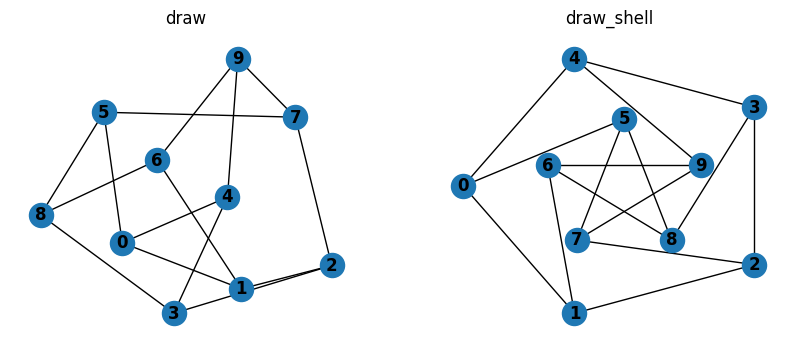

In [24]:
import matplotlib.pyplot as plt
G = nx.petersen_graph() # Graph generator
fig, axes = plt.subplots(1,2, figsize = (10,4)) # 1 แถว 2 หลัก
# ax1
ax1 = axes[0]
ax1.set_title("draw")
nx.draw(G, with_labels=True, font_weight='bold', ax= ax1)
# ax2
ax2 = axes[1]
ax2.set_title("draw_shell")
nx.draw_shell(G, nlist=[[5,6,7,8,9], [0,1,2,3,4]], with_labels=True, font_weight='bold', ax= ax2)
# nlist= [วงใน] [วงนอก]
plt.show()

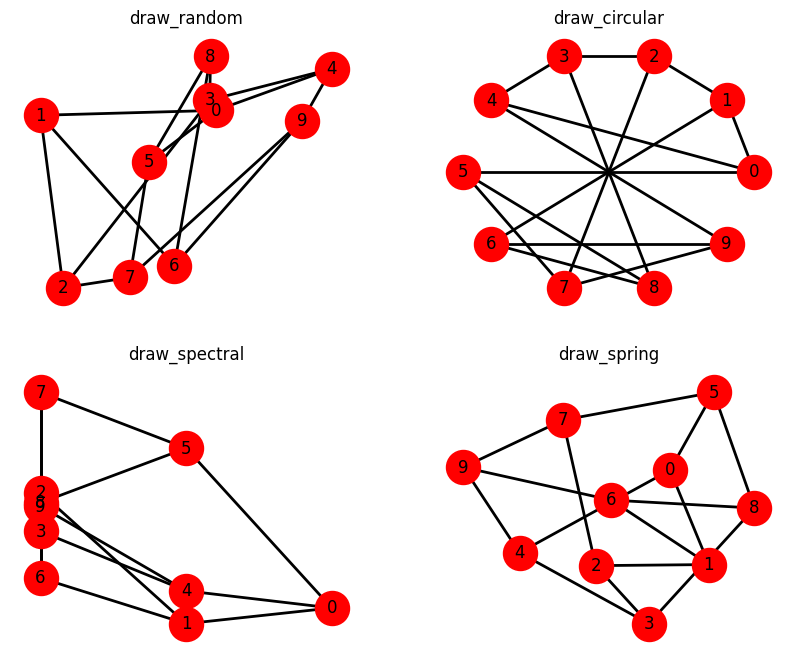

In [25]:
options = {
    'with_labels': 'True',
    'node_color': 'red',
    'node_size': 600,
    'width': 2,
}
fig, axes = plt.subplots(2,2,figsize = (10,8))

ax1 = axes[0][0]
ax1.set_title("draw_random")
nx.draw_random(G, **options, ax= ax1)

ax2 = axes[0][1]
ax2.set_title("draw_circular")
nx.draw_circular(G, **options, ax= ax2)

ax3 = axes[1][0]
ax3.set_title("draw_spectral")
nx.draw_spectral(G, **options ,ax= ax3)

ax4 = axes[1][1]
ax4.set_title("draw_spring")
nx.draw_spring(G, **options, ax= ax4)

---

## Graph Generator

### Complete Graph

In [26]:
# Undirected Graph
G = nx.complete_graph(5) # กราฟที่ connect ติดกันหมดเลย
print(len(G))
print(G.size())

5
10


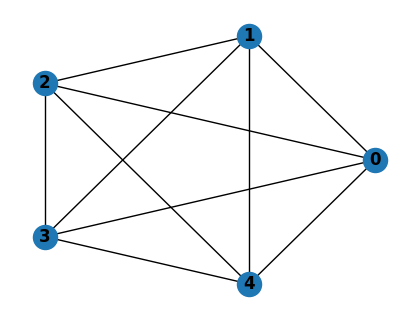

In [27]:
fig = plt.figure(1, figsize=(4, 3))
nx.draw_circular(G, with_labels=True, font_weight='bold')

In [28]:
# Directed Graph
G = nx.complete_graph(5, nx.DiGraph())
print(len(G))
print(G.size())

5
20


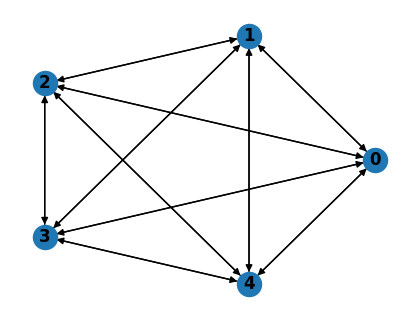

In [29]:
fig = plt.figure(1, figsize=(4, 3))
nx.draw_circular(G, with_labels=True, font_weight='bold')

---

### `Practice#2` Use NetworkX's Graph generator to create a graph and draw a graph

### 1. Cycle Graph with 9 nodes

9
9


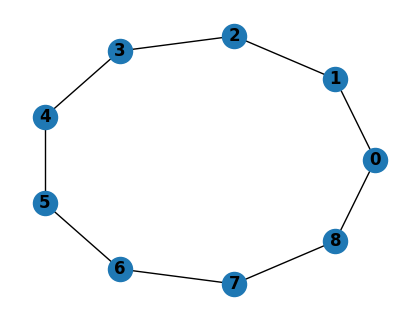

In [20]:
import matplotlib.pyplot as plt
import networkx as nx

# Hint: 
# Use cycle_graph(n)
# n = number of nodes
G = nx.cycle_graph(9)
print(len(G))
print(G.size())

fig = plt.figure(1, figsize=(4, 3))
nx.draw_circular(G, with_labels=True, font_weight='bold')

### 2. Wheel Graph with 6 nodes

6
10


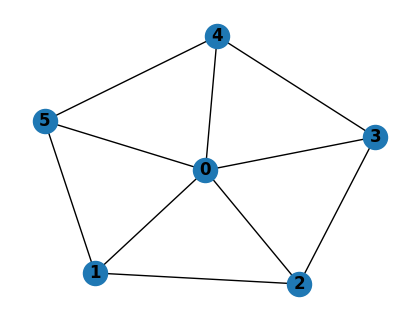

In [18]:
# Hint: 
# Use wheel_graph(n)
# n = number of nodes

G = nx.wheel_graph(6)
print(len(G))
print(G.size())

fig = plt.figure(1, figsize=(4, 3))
nx.draw(G, with_labels=True, font_weight='bold')

### 3. Star Graph with 10 nodes

11
10


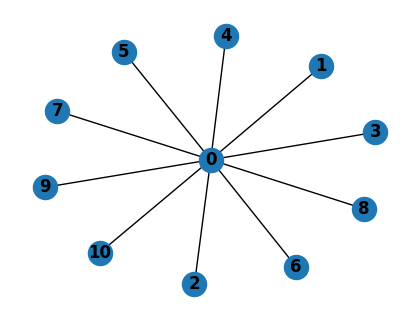

In [17]:
# Hint: 
# Use star_graph(n)
# n = number of nodes

G = nx.star_graph(10)
print(len(G))
print(G.size())

fig = plt.figure(1, figsize=(4, 3))
nx.draw(G, with_labels=True, font_weight='bold')


### 4. n-Cubes Graph with 8 nodes

256
1024


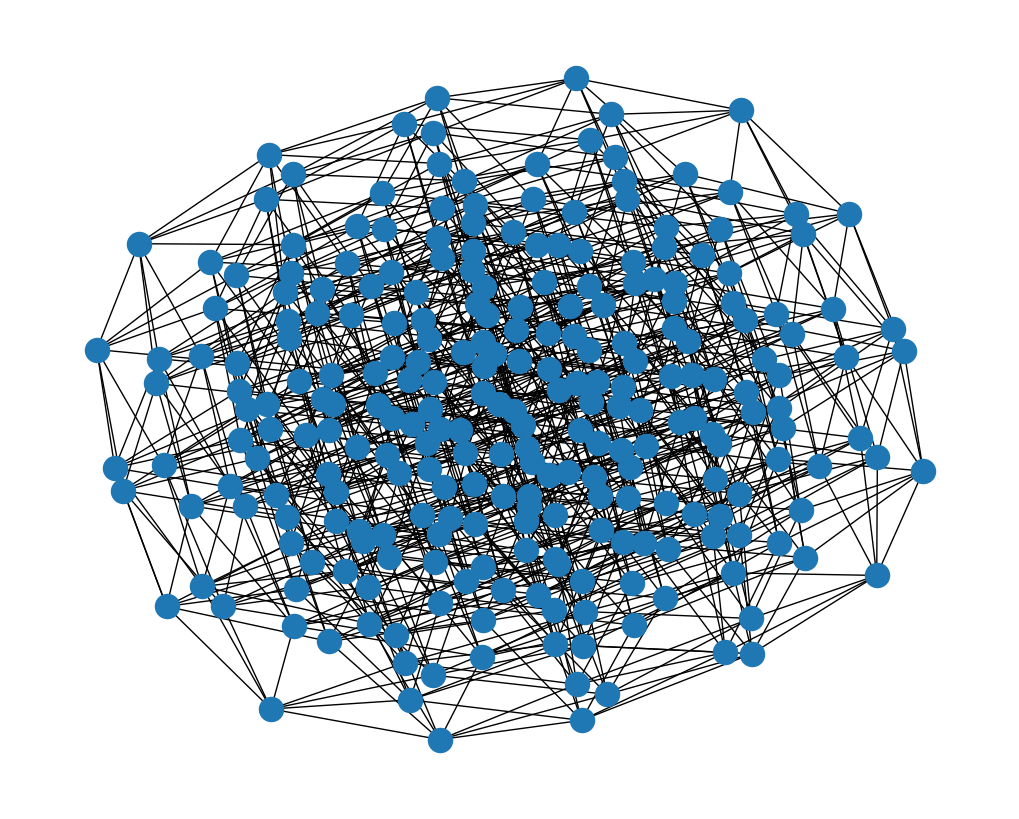

In [26]:
# Hint: 
# Use hypercube_graph(n)
# n = number of nodes

G = nx.hypercube_graph(8)
print(len(G))
print(G.size())

fig = plt.figure(1, figsize=(10, 8))
nx.draw_spring(G, font_weight='bold')

### 5. Bipartite Graph with 10 nodes

Bipartite Set:
Node set from U: {1, 2, 3, 4}
Node set from V: {'c', 'a', 'b'}


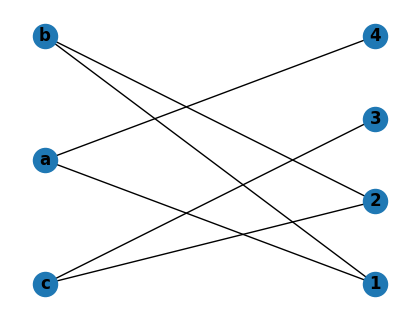

In [32]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite

# Algorithm ในการ matching จับคู่ โดยเราจะใช้ Bipartite Graph
# Create a bipartite graph

B = nx.Graph()

# Define two sets of nodes (U and V)
nodes_set_U = {1, 2, 3} # มันจะไม่ connect ในเซ็ตเดียวกับตัวมันเอง
nodes_set_V = {'a', 'b', 'c'}

# Add nodes to the graph and specify the 'bipartite' attribute
B.add_nodes_from(nodes_set_U, bipartite=0)  # 0 denotes the first set
B.add_nodes_from(nodes_set_V, bipartite=1)  # 1 denotes the second set

# Add edges between the two sets
B.add_edges_from([(1, "a"), (1, "b"), (2, "b"), (2, "c"), (3, "c"), (4, "a")])

bottom_nodes, top_nodes = bipartite.sets(B)

print("Bipartite Set:")
print("Node set from U:",bottom_nodes)
print("Node set from V:",top_nodes)

# Plot the bipartite graph
fig = plt.figure(1, figsize=(4, 3))
pos = nx.bipartite_layout(B, top_nodes)
nx.draw(B, pos, with_labels=True, font_weight='bold')
plt.show()

for more information: 
https://networkx.org/documentation/stable/reference/generators.html

---

# Isomorphism of Graphs
### (เช็คว่ากราฟนี้สามารถแทนที่กันได้หรือไม่)

| Function | Detail |
| --- | --- |
| is_isomorphic(G1, G2[, node_match, edge_match]) | Returns True if the graphs G1 and G2 are isomorphic and False otherwise |
| could_be_isomorphic(G1, G2) | Returns False if graphs are definitely not isomorphic |

could_be_isomorphic ไม่ได้การันตีแต่แค่เช็คเบื้องต้น

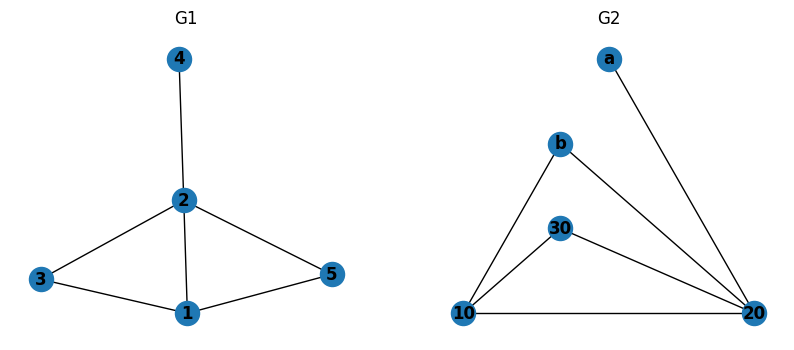

Graphs are isomorphic!


In [33]:
import networkx as nx

# Create two example graphs
G1 = nx.Graph()
G1.add_edges_from([(1, 2), (2, 3), (3, 1),(4 , 2),(5, 1), (5,  2)])

G2 = nx.Graph()
G2.add_edges_from([(10, 20), (20, 30), (30, 10),("a" , 20),("b", 10), ("b",  20)])

fig, axes = plt.subplots(1,2, figsize = (10,4))
# ax1
ax1 = axes[0]
ax1.set_title("G1")
nx.draw(G1, with_labels=True, font_weight='bold', ax= ax1)
# ax2
ax2 = axes[1]
ax2.set_title("G2")
nx.draw_planar(G2, with_labels=True, font_weight='bold', ax= ax2)
plt.show()


if nx.could_be_isomorphic(G1, G2):
    if nx.is_isomorphic(G1, G2):
        print("Graphs are isomorphic!")
    else:
        print("Graphs are not isomorphic.")
else:
    print("Graphs cannot be isomorphic as they have different number of nodes or edges.")


---

## Connectivity

path คือทางเดินของกราฟ
circuit คือทางเดินของกราฟเหมือน Path แต่วนกลับมาที่จุด vertex เดิม

* A `path` is a __sequence of edges__ that begins at a vertex of a graph and travels from vertex $u$ to vertex $v$ along edges of the graph.

* The path is a `circuit` if it begins and ends at the __same vertex__ ($u = v$) and has length greater than zero. <br>

* A path or circuit is `simple` if it does __not contain the same edge__ more than once.

## Connectedness in Undirected Graphs

An undirected graph is called `connected` if there is a path between every pair of vertices. (มีทางเดินเชื่อมทุกจุด) <br>

An undirected graph that is not connected is called `disconnected`. We say that we disconnect a graph when we remove vertices or edges, or both, to produce a disconnected subgraph

A connected component of a graph G is a connected subgraph of G that is not a proper subgraph of another connected subgraph of G. <br>

A graph G that is not connected has two or more connected components that are disjoint and have G as their union.

## Connectedness in Directed Graphs

* A directed graph is `strongly connected` if there is a path from a to b and a path from b to a whenever a and b are vertices in the graph <br>

* A directed graph is `weakly connected` if there is a path between every two vertices in the underlying undirected graph, which is the undirected graph obtained by ignoring the directions of the edges of the directed graph

| Function | Detail |
| --- | --- |
| is_strongly_connected(G) | Test directed graph for strong connectivity.|
| number_strongly_connected_components(G) | Returns number of strongly connected components in graph.|
| strongly_connected_components(G) | Generate nodes in strongly connected components of graph.|
| is_weakly_connected(G) | Test directed graph for weak connectivity. |
| number_weakly_connected_components(G) | Returns the number of weakly connected components in G. |
| weakly_connected_components(G) | Generate weakly connected components of G |

---

# Euler and Humilton Circuits and Paths

## Euler Circuits and Paths

* An `Euler circuit` in a graph G is a simple circuit containing __every edge__ of G.
* An `Euler path` in G is a simple path containing __every edge__ of G.

Eulerian with NetworkX <br>
| Function | Detail |
| --- | --- |
| is_eulerian(G) | Returns True if and only if G is Eulerian |
| eulerian_circuit(G[, source, keys]) | Returns an iterator over the edges of an Eulerian circuit in G |
| eulerize(G) | Transforms a graph into an Eulerian graph |
| is_semieulerian(G) | Return True iff G is semi-Eulerian |
| has_eulerian_path(G[, source]) | Return True iff G has an Eulerian path |
| eulerian_path(G[, source, keys]) | Return an iterator over the edges of an Eulerian path in G |

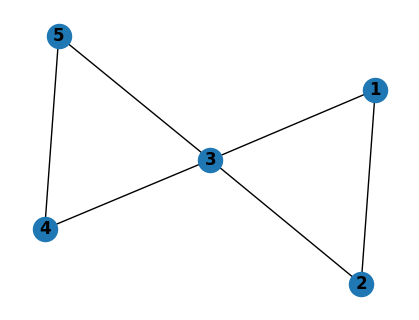

In [34]:
import networkx as nx
import matplotlib.pyplot as plt

# Create an Example graph
G = nx.Graph()
G.add_edges_from([(1, 2), (2, 3), (3, 1), (3, 4), (4, 5), (5, 3)])
# Change graph by add more edge
#G.add_edges_from([(1, 2), (2, 3), (3, 1), (3, 4), (4, 5), (5, 3), (5, 2)])

# Plot the graph
fig = plt.figure(1, figsize=(4, 3))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold')
plt.show()

In [35]:
# Check if the graph has an Eulerian circuit
if nx.is_eulerian(G):
    print("Graph has an Eulerian circuit.")
    # Find an Eulerian circuit
    eulerian_circuit = list(nx.eulerian_circuit(G))
    print("Eulerian Circuit:", eulerian_circuit)
else:
    print("Graph does not have an Eulerian circuit.")

Graph has an Eulerian circuit.
Eulerian Circuit: [(1, 3), (3, 5), (5, 4), (4, 3), (3, 2), (2, 1)]


In [36]:
# Check if the graph has an Eulerian path
if nx.has_eulerian_path(G.to_directed()):
    print("Graph has an Eulerian path.") 
    # Find an Eulerian path
    eulerian_path = list(nx.eulerian_path(G.to_directed()))
    print("Eulerian Path:", eulerian_path)
else:
    print("Graph does not have an Eulerian path.")


Graph has an Eulerian path.
Eulerian Path: [(1, 3), (3, 5), (5, 4), (4, 5), (5, 3), (3, 4), (4, 3), (3, 2), (2, 3), (3, 1), (1, 2), (2, 1)]


---

### `Practice#3` Find Euler Circuits and Paths of a complete graph with 5 nodes

5
10
Graph has an Eulerian circuit.
Eulerian Circuit: [(0, 4), (4, 3), (3, 2), (2, 4), (4, 1), (1, 3), (3, 0), (0, 2), (2, 1), (1, 0)]
Graph has an Eulerian path.
Eulerian Path: [(0, 4), (4, 3), (3, 4), (4, 2), (2, 3), (3, 2), (2, 4), (4, 1), (1, 3), (3, 1), (1, 2), (2, 1), (1, 4), (4, 0), (0, 3), (3, 0), (0, 2), (2, 0), (0, 1), (1, 0)]


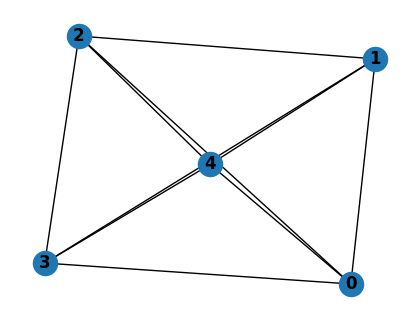

In [27]:
# Hint:
# G = nx.complete_graph(5)

G = nx.complete_graph(5)
print(len(G))
print(G.size())

fig = plt.figure(1, figsize=(4, 3))
nx.draw(G, with_labels=True, font_weight='bold')

if nx.is_eulerian(G):
    print("Graph has an Eulerian circuit.")
    # Find an Eulerian circuit
    eulerian_circuit = list(nx.eulerian_circuit(G))
    print("Eulerian Circuit:", eulerian_circuit)
else:
    print("Graph does not have an Eulerian circuit.")

if nx.has_eulerian_path(G.to_directed()):
    print("Graph has an Eulerian path.") 
    # Find an Eulerian path
    eulerian_path = list(nx.eulerian_path(G.to_directed()))
    print("Eulerian Path:", eulerian_path)
else:
    print("Graph does not have an Eulerian path.")


## Hamilton Circuits and Paths

* A `Hamilton path` is a simple path in a graph $G$ that passes through every vertex exactly once
* A `Hamilton circuit` is a simple circuit in a graph $G$ that passes through every vertex exactly once

Finding Hamiltonian circuits or paths in a graph is a well-known `NP-complete` problem, and there might not always be a straightforward solution.

There are some useful necessary conditions. We describe two of these now.
* __Dirac’s Theorem__: <br> 
If $G$ is a __simple graph__ with $n$ ≥ 3 vertices such that the degree of every vertex in $G$ is ≥ $n/2$, then $G$ has a Hamilton circuit. <br>


In [ ]:
def check_dirac_theorem(graph):
    # Check if the graph satisfies Dirac's condition
    n = len(graph.nodes)
    for node in graph.nodes:
        if graph.degree(node) < n / 2:
            return False
    return True


* __Ore’s Theorem__: <br>
 If $G$ is a __simple graph__ with $n$ ≥ 3 vertices such that $deg(u) + deg(v)$ ≥ $n$ for every pair of non-adjacent vertices, then $G$ has a Hamilton circuit.

In [ ]:
def check_ores_theorem(graph):
    # Check if the graph satisfies Ore's condition
    n = len(graph.nodes)
    for u in graph.nodes:
        for v in graph.nodes:
            if u != v and not graph.has_edge(u, v):
                if graph.degree(u) + graph.degree(v) < n:
                    return False
    return True

### Tournament
Functions concerning tournament graphs.

A `tournament graph` is a complete oriented graph. In other words, it is a __directed graph__ in which there is exactly one directed edge joining each pair of distinct nodes.

NetworkX implements Hamiltonian-related function on `tourmament graph`

| Functions | Detail |
| --- | --- |
| hamiltonian_path(G) | Returns a Hamiltonian path in the given tournament graph. |
| is_reachable(G, s, t) | Decides whether there is a path from s to t in the tournament.|
| is_strongly_connected(G) | Decides whether the given tournament is strongly connected. |
| is_tournament(G) | Returns True if and only if G is a tournament. |
| random_tournament(n[, seed]) | Returns a random tournament graph on n nodes.|
| score_sequence(G) | Returns the score sequence for the given tournament graph.|

---

## Shortest-Path Problem

Use Dijkstra's Algorithm to find the single-source shortest path

Shortest path from 1 to 1: [1]
Shortest path from 1 to 2: [1, 2]
Shortest path from 1 to 3: [1, 3]
Shortest path from 1 to 5: [1, 5]
Shortest path from 1 to 4: [1, 5, 4]


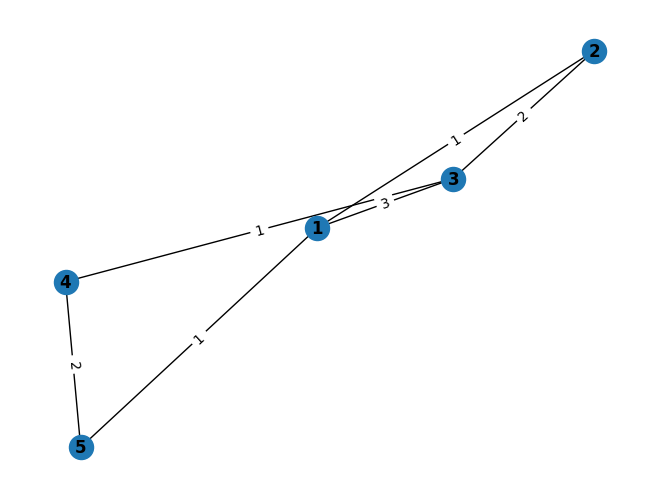

In [37]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a weighted graph
G = nx.Graph()
G.add_weighted_edges_from([(1, 2, 1), (2, 3, 2), (3, 1, 3), (3, 4, 1), (4, 5, 2), (5, 1, 1)])

# Find the shortest paths from node 1 to all other nodes
shortest_paths = nx.single_source_dijkstra_path(G, source=1)

# Print the shortest paths
for target, path in shortest_paths.items():
    print(f"Shortest path from 1 to {target}: {path}")

# Plot the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.show()

---

<div style="color:greenyellow;">นายศวิษฐ์ โกสียอัมพร 65070506026</div>